In [9]:
import pandas as pd
results = []
fewshots = [0, 3, 5, 10]
for _id in fewshots:
    record_path = f'../eval_results/eval_results_gpt_3_5/ajgt_few_shot/ajgt-fewshot-{_id}-temp-1.0.jsonl'
    with open(record_path, "r") as f:
        events_df = pd.read_json(f, lines=True)
    results.append(['GPT-3.5', _id,  round(events_df[events_df["final_report"].notnull()]["final_report"].to_list()[0]['accuracy'], 4)])

In [10]:
import pandas as pd
for _id in fewshots:
    record_path = f'../eval_results/eval_results_gpt_4_0/ajgt_few_shot/ajgt-fewshot-{_id}-temp-1.0{"" if _id !=0 else "_updated_prompt"}.jsonl'
    with open(record_path, "r") as f:
        events_df = pd.read_json(f, lines=True)
    results.append(['GPT-4.0', _id,  round(events_df[events_df["final_report"].notnull()]["final_report"].to_list()[0]['accuracy'], 4)])

In [11]:
df = pd.DataFrame(results)
df.columns = ['Model', 'Fewshot Size', 'Accuracy']

In [12]:
df

,Model,Fewshot Size,Accuracy
0,GPT-3.5,0,0.8694
1,GPT-3.5,3,0.8083
2,GPT-3.5,5,0.8500
3,GPT-3.5,10,0.8420
4,GPT-4.0,0,0.9114
5,GPT-4.0,3,0.9284
6,GPT-4.0,5,0.9537
7,GPT-4.0,10,0.9231


In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("Paired")

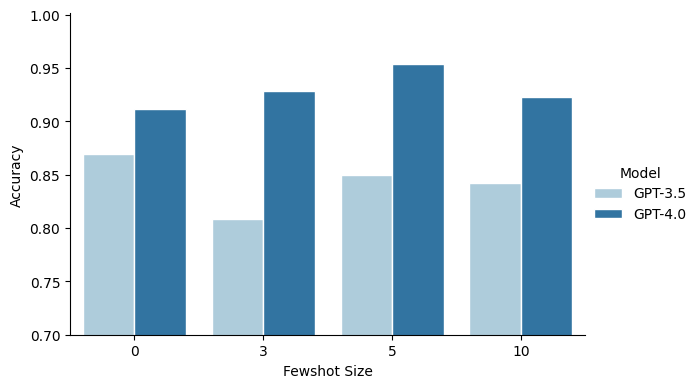

In [15]:
sns.catplot(
    x="Fewshot Size", 
    y="Accuracy", 
    data=df, 
    kind="bar",
    hue = "Model",
    errorbar = "sd",
    edgecolor="white",
    errwidth=1.5,
    capsize = 0.1,
    height=4, 
    aspect=1.5,)
plt.ylim(0.7)
plt.savefig("../figures/fewshot_results.pdf")